In [1]:
import pandas as pd
import covid.util as util
import covid.jhu as jhu
import covid.covidtracking as covidtracking

import covid.states as states

import matplotlib.pyplot as plt

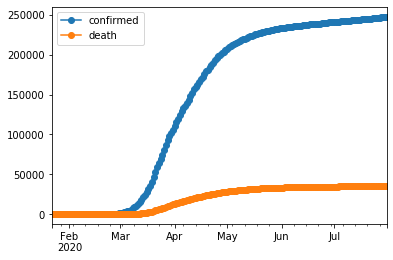

In [2]:
world = jhu.load_world()
world['Italy']['tot'].plot(style='-o')
plt.show()

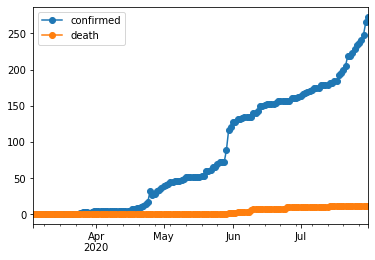

In [3]:
counties = jhu.load_us(counties=True)
start = '2020-03-04'
place = 'NC-Hertford'
counties[place][start:].plot(style='o-')
plt.show()

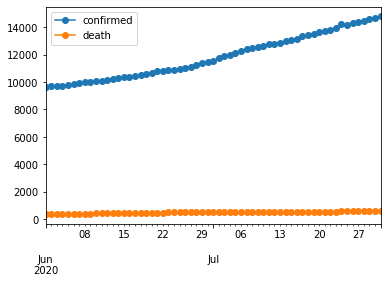

In [16]:
US = jhu.load_us()
start = '2020-06-01'
place = 'DE'
US[place][start:].plot(style='o-')
plt.show()

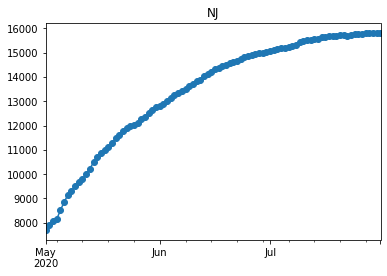

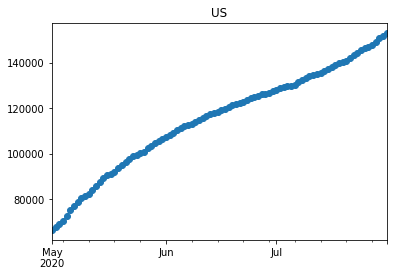

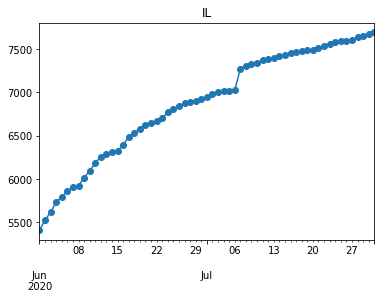

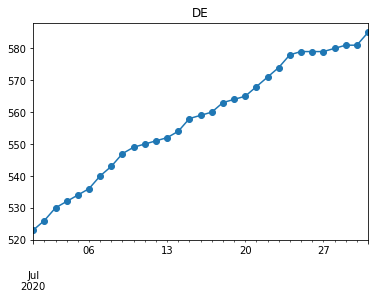

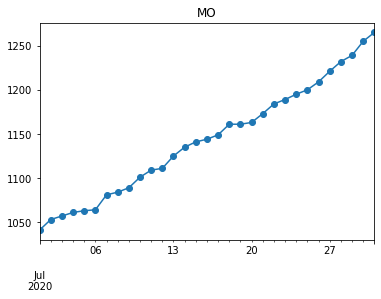

In [32]:
# Redistributing data

data = util.load_data()
start='2020-06-01'

for place in ['NJ', 'US']:
    util.redistribute(data[place]['data'], '2020-6-25', 1750, 60)

# Redistribute ~225 IL probable deaths added on 2020-07-07
#util.redistribute(data['IL']['data'], '2020-07-07', 225, 30)
util.redistribute(data['DE']['data'], '2020-07-24', 45, 30)
util.redistribute(data['MO']['data'], '2020-07-23', 25, 30)

# Visualize
data['NJ']['data'].loc['2020-05-01':, 'death'].plot(style='-o')
plt.title('NJ')
plt.show()

data['US']['data'].loc['2020-05-01':, 'death'].plot(style='-o')
plt.title('US')
plt.show()

data['IL']['data'].loc['2020-06-01':, 'death'].plot(style='-o')
plt.title('IL')
plt.show()

data['DE']['data'].loc['2020-07-01':, 'death'].plot(style='-o')
plt.title('DE')
plt.show()

data['MO']['data'].loc['2020-07-01':, 'death'].plot(style='-o')
plt.title('MO')
plt.show()



In [ ]:
# Create list of county keys sorted by descending population
county_info = jhu.get_county_info().sort_values('Population', ascending=False)
pd.Series(county_info.index).to_csv('counties.txt', header=False, index=False)

In [ ]:
# County json file sorted by descending population
num_counties = 500
county_info = jhu.get_county_info().sort_values('Population', ascending=False)
json = county_info[['state', 'name', 'Population', 'Combined_Key']].iloc[:num_counties].to_json(orient='index')
with open(f'counties-{num_counties}.js', 'w') as f:
    f.write(f'var places={json};')

In [ ]:
# State json file
state_info = jhu.get_state_info().sort_index()
json = state_info[['name', 'Population', 'Combined_Key']].to_json(orient='index')
with open('states.js', 'w') as f:
    f.write(f'var places={json};')

In [ ]:
county_info = jhu.get_county_info()
county_info.loc['NY-New York City']
